# 1. Defining the Question

## 1.1 Specifying the Data Analysis Question
Create a credit scoring model to predict whether a new customer will default based on the historical data in the given dataset. Select one or several suitable learning algorithms and a suitable metric for assessing quality model.

## 1.2 Defining the Metric for Success
Since the problem we are tackling is a classification problem, we will use classification reports and confusion matrices as well as accuracy and precision scores to measure the success of the models used.

## 1.3 Understanding the Context
Talar is a finance app that offers microloans to its users in Kenya, Philippines and Tanzania. It uses a variety of information, from basic biographical data to the loan applications that come through daily. 
You work with the product team as a data scientist to help create effective credit scoring models used to assess different customer segments.

## 1.4 Recording the Experimental Design
- load libraries and dataset
- clean dataset:
    - deal with duplicate and/or missing values
    - deal with outliers, where necessary
    - deal with other anomalies in the data, where necessary
- carry out exploratory data analysis
- carry out feature engineering
- carry out modeling
    - tune hyperparameters
    - feature selection
    - alternative models
- summarize and provide recommendations
- challenge the solution

## 1.5 Assessing the Relevance of the Data
While the data provided was relevant, it had a lot of imbalanced classes which affected the results of the modeling.

# 2. Data Preparation

In [ ]:
# load Numpy
import numpy as np

# load Pandas
import pandas as pd

# load matplotlib.pyplot
import matplotlib.pyplot as plt

# load Seaborn
import seaborn as sns

# customizing display settings
%matplotlib inline
pd.set_option("display.max.columns", None)

from pylab import rcParams
rcParams["figure.figsize"] = [7, 5]

In [ ]:
# load the train dataset
train = pd.read_csv('tala_train.csv', index_col = 'id')

# preview the first 5 records
train.head()

,application_dt,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg,default_flg
id,,,,,,,,,,,,,,,,,,
1,01JAN2014,SCH,M,27,Y,Y,0,0,-1.917831,0,40,2,3,32000,1,4,N,0
2,01JAN2014,GRD,F,26,N,N,0,0,-1.153144,2,60,2,3,50000,2,1,N,0
3,01JAN2014,SCH,M,35,N,N,0,1,-1.732810,0,40,1,2,20000,4,3,N,0
4,01JAN2014,GRD,F,35,N,N,0,1,-2.552133,2,20,2,3,80000,1,3,N,0
5,01JAN2014,UGR,F,24,N,N,0,0,-1.914581,1,50,2,3,27000,1,2,N,0


In [ ]:
# check dataset shape
train.shape

(110148, 18)

Our dataset has 110,148 records and 18 variables (excluding the ID column).

In [ ]:
# check for duplicated values
train.duplicated().any()

False

There are no duplicated values so there's no need to drop any.

In [ ]:
# check for missing values
train.isna().sum()

application_dt       0
education_cd       478
gender_cd            0
age                  0
car_own_flg          0
car_type_flg         0
appl_rej_cnt         0
good_work_flg        0
Score_bki            0
out_request_cnt      0
region_rating        0
home_address_cd      0
work_address_cd      0
income               0
SNA                  0
first_time_cd        0
Air_flg              0
default_flg          0
dtype: int64

The 'education_cd' variable has 478 missing values. As it is a categorical variable about the level of education attained, we will replace these missing values with the string 'N/A'.

In [ ]:
train['education_cd'] = train.education_cd.fillna('N/A')

# confirm that we don't have any more missing values
train.isna().any()

application_dt     False
education_cd       False
gender_cd          False
age                False
car_own_flg        False
car_type_flg       False
appl_rej_cnt       False
good_work_flg      False
Score_bki          False
out_request_cnt    False
region_rating      False
home_address_cd    False
work_address_cd    False
income             False
SNA                False
first_time_cd      False
Air_flg            False
default_flg        False
dtype: bool

In [ ]:
# check the data types
train.dtypes

application_dt      object
education_cd        object
gender_cd           object
age                  int64
car_own_flg         object
car_type_flg        object
appl_rej_cnt         int64
good_work_flg        int64
Score_bki          float64
out_request_cnt      int64
region_rating        int64
home_address_cd      int64
work_address_cd      int64
income               int64
SNA                  int64
first_time_cd        int64
Air_flg             object
default_flg          int64
dtype: object

We should split the 'application_dt' variable into day and month.

In [ ]:
train['application_dt'] =  train['application_dt'].apply(lambda x : '%s %s %s' % (x[0:2], x[2:5], x[5:]))
train[['application_day', 'application_month', 'year']] = train['application_dt'].str.split(" ", 2, expand = True)

# rearrange columns
cols = train.columns.to_list()
cols.insert(0, 'application_day')
cols.insert(1, 'application_month')

# drop unnecessary columns
train.drop(columns = ['application_dt', 'year', ], inplace = True)
cols.remove('application_dt')
cols.remove('year')
cols = cols[:-2]

# rearrange columns
train = train[cols]
train.head()

,application_day,application_month,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg,default_flg
id,,,,,,,,,,,,,,,,,,,
1,01,JAN,SCH,M,27,Y,Y,0,0,-1.917831,0,40,2,3,32000,1,4,N,0
2,01,JAN,GRD,F,26,N,N,0,0,-1.153144,2,60,2,3,50000,2,1,N,0
3,01,JAN,SCH,M,35,N,N,0,1,-1.732810,0,40,1,2,20000,4,3,N,0
4,01,JAN,GRD,F,35,N,N,0,1,-2.552133,2,20,2,3,80000,1,3,N,0
5,01,JAN,UGR,F,24,N,N,0,0,-1.914581,1,50,2,3,27000,1,2,N,0


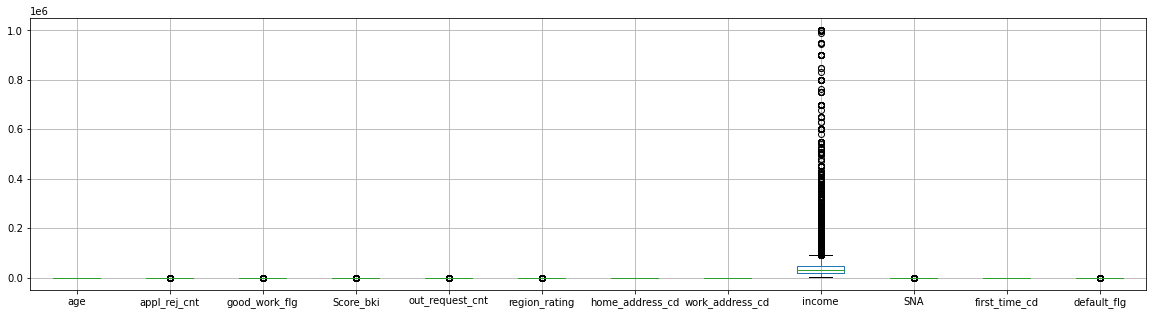

In [ ]:
# checking for outliers
plt.figure(figsize = (20, 5))
train.boxplot()
plt.show()

We see that the 'income' variable has a lot of outliers. However, we cannot remove them because they reflect real life income earnings, and therefore provide useful insights. However, it is worth keeping in mind that logistic regression assumes that the dataset it will be fitted on has few to no outliers.

We are now done with data cleaning and preparation, and can now move on to the exploratory data analysis stage.

# 3. Exploratory Data Analysis

## 3.1 Univariate Analysis

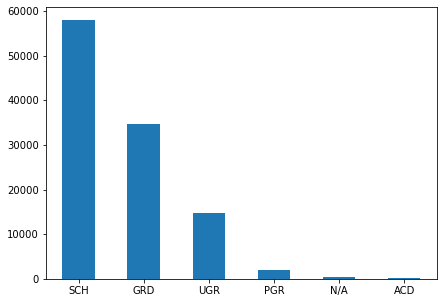

In [ ]:
# distribution of education
train.education_cd.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the customers attained 'SCH'education level.

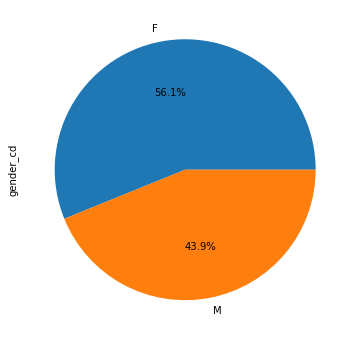

In [ ]:
# exploring the 'gender_cd' variable
plt.figure(figsize = (6, 6))
train.gender_cd.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

Majority of the customers in this dataset are female.

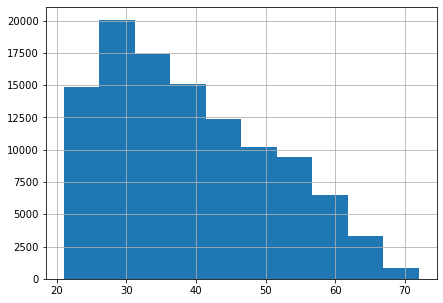

In [ ]:
# exploring the 'age variable'
train.age.hist()
plt.show()

The age distribution of the customers is skewed to the right.

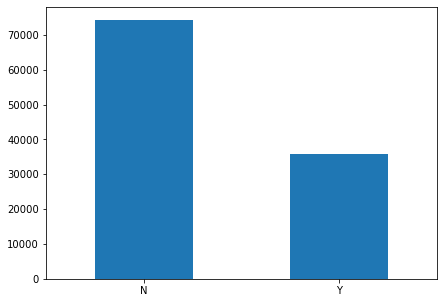

In [ ]:
# exploring the 'car_own_flg' variable
train.car_own_flg.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the customers don't have a car.

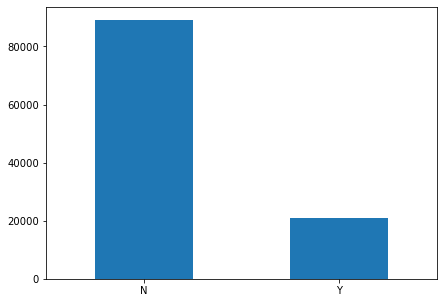

In [ ]:
# exploring the 'car_type_flg' variable
train.car_type_flg.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the customers don't have a foreign car.

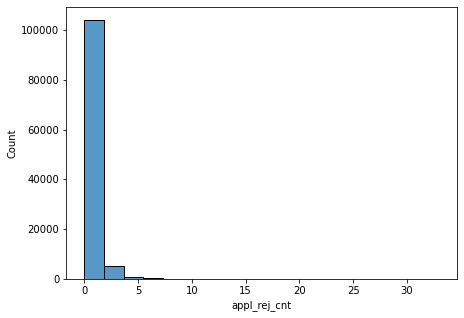

In [ ]:
# exploring the 'appl_rej_cnt' variable
sns.histplot(train['appl_rej_cnt'])
plt.show()

Majority of the customers have 0 denied past claims.

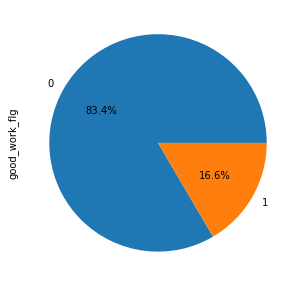

In [ ]:
# exploring the 'good_work_flg' variable
train.good_work_flg.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

Majority of the customers don't have the flag for good work.

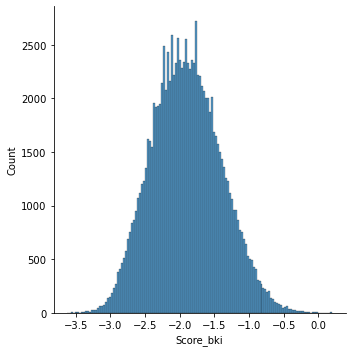

In [ ]:
sns.displot(train['Score_bki'])

This variable displays a normal distribution.

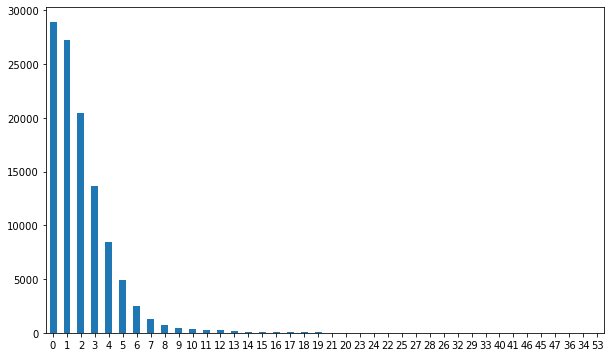

In [ ]:
# exploring the 'out_request_cnt' variable
plt.figure(figsize = (10, 6))
train.out_request_cnt.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

These variables are skewed to the right.

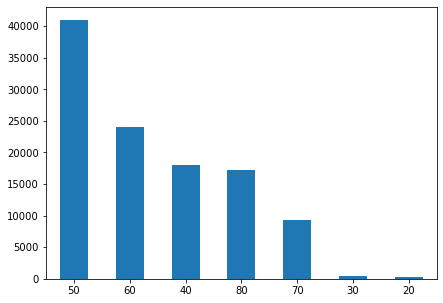

In [ ]:
# exploring the 'region_rating' variable
train.region_rating.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the customers are from the region/regions with a rating of 50.

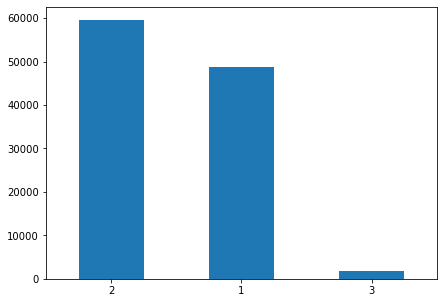

In [ ]:
# exploring the 'home_address_cd' variable
train.home_address_cd.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the customers are in home address category 2.

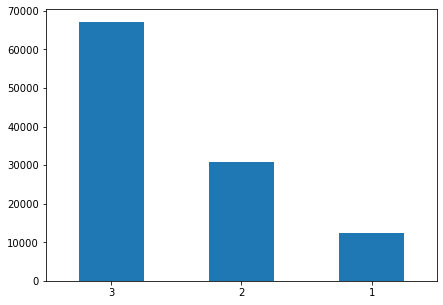

In [ ]:
# exploring the 'work_address_cd' variable
train.work_address_cd.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the customers are of work address category 3.

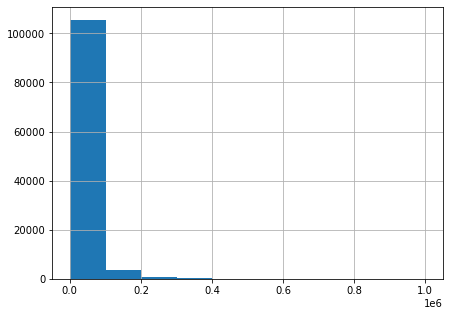

In [ ]:
# histogram of the income variable
train.income.hist()
plt.show()

The income variable is strongly skewed to the right.

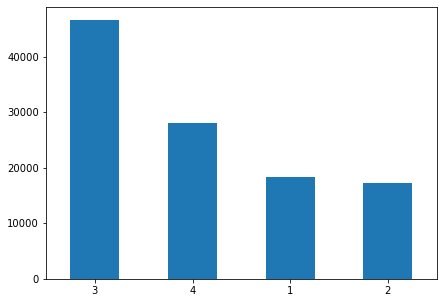

In [ ]:
# exploring the 'first_time_cd' variable
train.first_time_cd.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the customers are associated with prescription code 3.

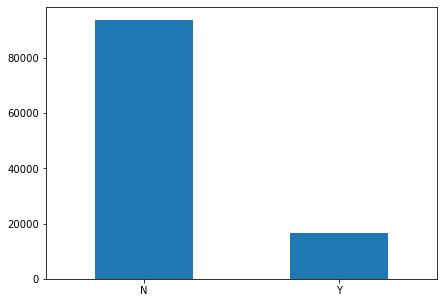

In [ ]:
# exploring the 'Air_flg' variable
train.Air_flg.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the customers didn't have passports.

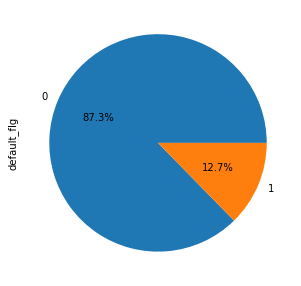

In [ ]:
# exploring the 'default_flg' variable
train.default_flg.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

A huge majority of the customers did not default compared to those who did.

## 3.2 Bivariate Analysis

We will investigate how the target variable relates to the other variables.

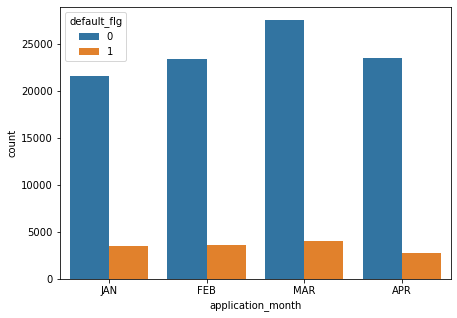

In [ ]:
# default_flg by application_month
sns.countplot(x = 'application_month', hue = 'default_flg', data = train)
plt.show()

March reported slightly higher instances of people defaulting while April reported the lowest.

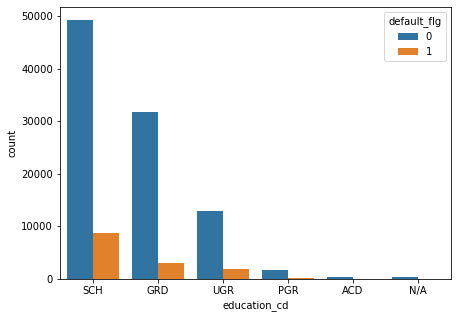

In [ ]:
# default_flg by education_cd
sns.countplot(x = 'education_cd', hue = 'default_flg', data = train)
plt.show()

Those who attained education level of 'SCH' defaulted more than the other education groups. But this can be attributed to the fact that the proportion of those with education level 'SCH' make up the majority of this particular variable.

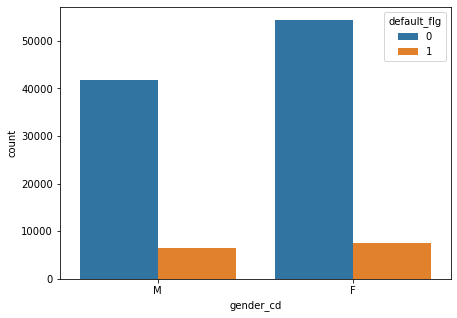

In [ ]:
# default_flg by gender_cd
sns.countplot(x = 'gender_cd', hue = 'default_flg', data = train)
plt.show()

Females appear to default slightly more than males.

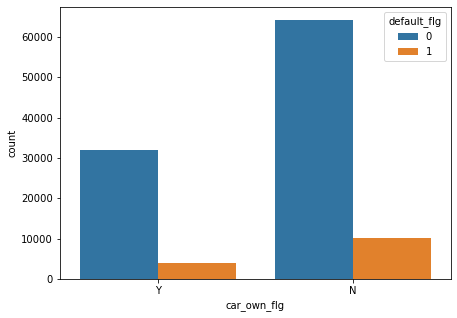

In [ ]:
# default_flg by car_own_flg
sns.countplot(x = 'car_own_flg', hue = 'default_flg', data = train)
plt.show()

Those without cars defaulted more than those with cars. However, the number of those without cars greatly outnumbers those with cars.

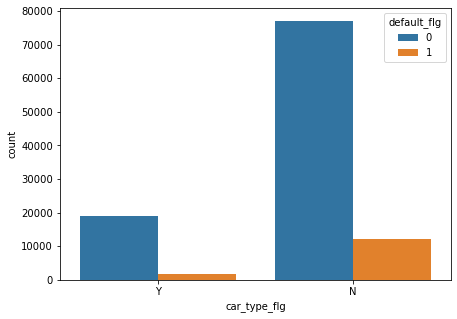

In [ ]:
# default_flg by car_type_flg
sns.countplot(x = 'car_type_flg', hue = 'default_flg', data = train)
plt.show()

Those without foreign cars defaulted more than those with.

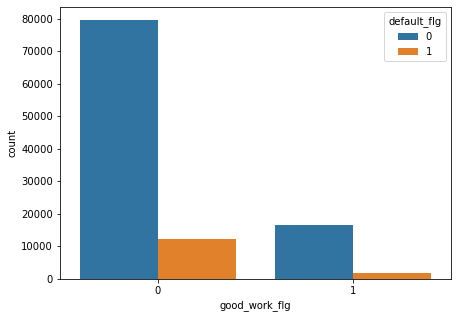

In [ ]:
# default_flg by good_work_flg
sns.countplot(x = 'good_work_flg', hue = 'default_flg', data = train)
plt.show()

Those who didn't have a good work flag defaulted more than those who did.

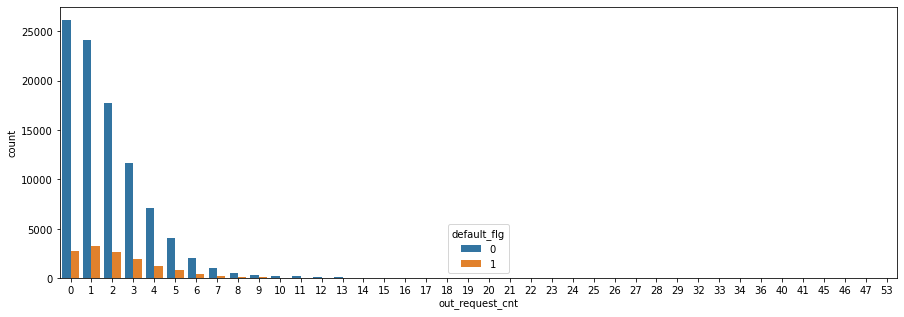

In [ ]:
# default_flg by out_request_cnt
plt.figure(figsize = (15, 5))
sns.countplot(x = 'out_request_cnt', hue = 'default_flg', data = train)
plt.show()

Those with one number of requests in the bureau defaulted more than the others.

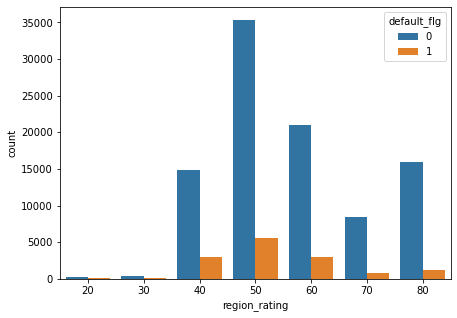

In [ ]:
# default_flg by region_rating
sns.countplot(x = 'region_rating', hue = 'default_flg', data = train)
plt.show()

Those in regions rated 50 defaulted the most, followed by those in regions rated 40. Those in regions rated 20 and 30 defaulted the least.

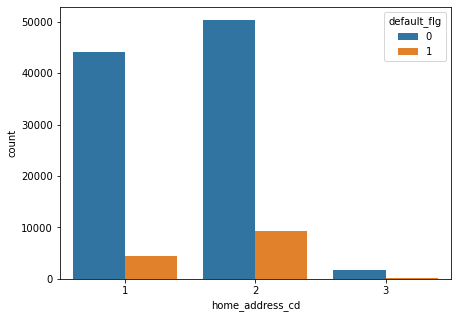

In [ ]:
# default_flg by home_address_cd
sns.countplot(x = 'home_address_cd', hue = 'default_flg', data = train)
plt.show()

Those in home address code 2 defaulted the most.

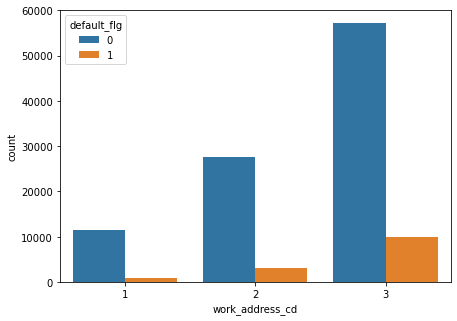

In [ ]:
# default_flg by work_address_cd
sns.countplot(x = 'work_address_cd', hue = 'default_flg', data = train)
plt.show()

Those in work address code 3 defaulted the most.

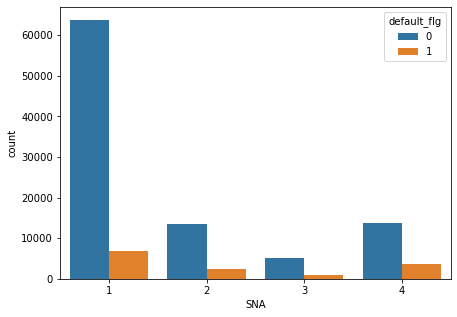

In [ ]:
# default_flg by SNA
sns.countplot(x = 'SNA', hue = 'default_flg', data = train)
plt.show()

Those of SNA code 1 defaulted the most while those in code 3 defaulted the least.

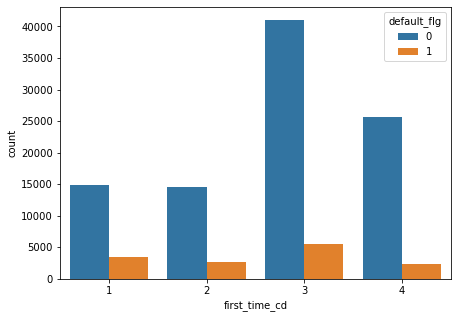

In [ ]:
# default_flg by first_time_cd
sns.countplot(x = 'first_time_cd', hue = 'default_flg', data = train)
plt.show()

Customers with first_time_cd of 3 defaulted the most. Those with a first_time_cd of 4 defaulted the least.

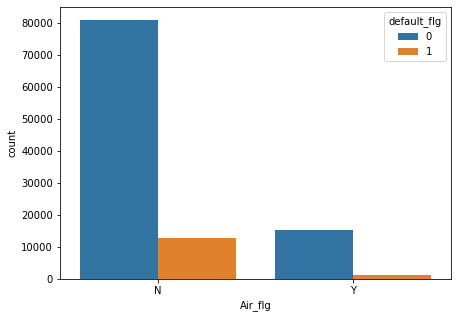

In [ ]:
# default_flg by Air_flg
sns.countplot(x = 'Air_flg', hue = 'default_flg', data = train)
plt.show()

Those without passports defaulted more than those with.

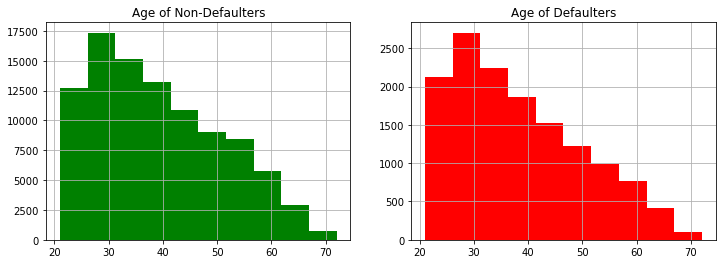

In [ ]:
# default_flg by age
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

# age when default_flg is 0
plt.subplot(1, 2, 1)
train.loc[train.default_flg == 0].age.hist(color = 'green')
plt.title("Age of Non-Defaulters")

# age when default_flg = 1
plt.subplot(1, 2, 2)
train.loc[train.default_flg == 1].age.hist(color = 'red')
plt.title("Age of Defaulters")

plt.show()

There doesn't seem to be a significant difference in the ages of those who defaulted and those who didn't.

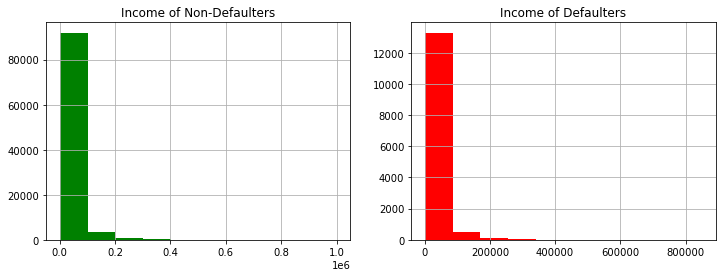

In [ ]:
# default_flg by income
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

# income when default_flg is 0
plt.subplot(1, 2, 1)
train.loc[train.default_flg == 0].income.hist(color = 'green')
plt.title("Income of Non-Defaulters")

# income when default_flg is 1
plt.subplot(1, 2, 2)
train.loc[train.default_flg == 1].income.hist(color = 'red')
plt.title("Income of Defaulters")

plt.show()

There doesn't seem to be a significant difference in the income of those who defaulted and that of those who didn't.

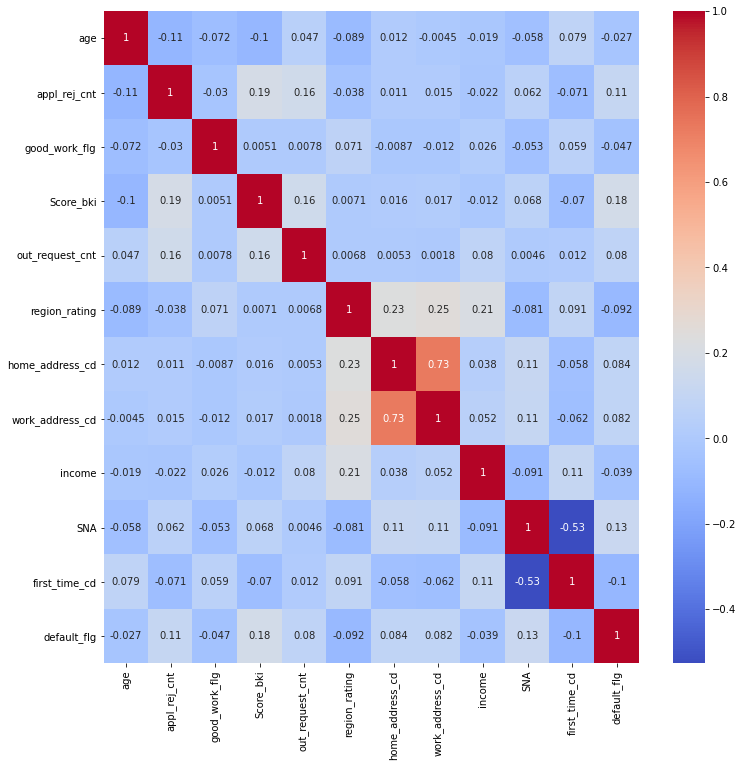

In [ ]:
# creating a heatmap of the correlations between the variables
plt.figure(figsize = (12, 12))
sns.heatmap(train.corr(), cmap = 'coolwarm', annot = True)
plt.show()

Here we see that 'home_address_cd' and 'work_address_cd' are highly correlated with each other while 'first_time_cd' and 'SNA' are inversely correlated with each other.

## 3.3 Feature Engineering

In [ ]:
train.describe()

,age,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,default_flg
count,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000
mean,39.249410,0.273205,0.165514,-1.904535,2.005002,56.751189,1.574945,2.497867,41012.648537,1.731588,2.765570,0.126775
std,11.518063,0.799099,0.371645,0.499397,2.266926,13.065923,0.527562,0.687651,45399.735051,1.122652,1.010151,0.332722
min,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000
25%,30.000000,0.000000,0.000000,-2.260434,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000,0.000000
50%,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000,0.000000
75%,48.000000,0.000000,0.000000,-1.567888,3.000000,60.000000,2.000000,3.000000,48000.000000,2.000000,4.000000,0.000000
max,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000,1.000000


In [ ]:
# binning our numerical variables
# binning age
interval = (18, 25, 35, 60, 90)
categories = ['student', 'youth', 'adult', 'senior']
train["age"] = pd.cut(train.age, interval, labels = categories)

# binning Score_bki
train["Score_bki"] = pd.qcut(train.Score_bki, q = 4)

# binning income
train["income"] = pd.qcut(train.income, q = 10)

In [ ]:
# encode 'application_month' 
def encode_month(month):
    if month == 'JAN':
        month = 1
    elif month == 'FEB':
        month = 2
    elif month == 'MAR':
        month = 3
    elif month == 'APR':
        month = 4
    return month

train['application_month'] = train['application_month'].apply(lambda x : encode_month(x))
train.sample(3)

,application_day,application_month,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg,default_flg
id,,,,,,,,,,,,,,,,,,,
57099,05,3,SCH,F,adult,Y,Y,0,0,"(-3.626, -2.26]",4,60,1,3,"(40000.0, 50000.0]",4,1,N,0
14603,22,1,SCH,F,student,N,N,0,0,"(-1.921, -1.568]",3,50,2,3,"(14000.0, 18000.0]",4,1,N,0
76188,24,3,SCH,M,youth,N,N,0,0,"(-1.921, -1.568]",1,50,2,3,"(40000.0, 50000.0]",2,3,N,0


In [ ]:
# set application_day and application_month to category dtype
train['application_day'] = train['application_day'].astype('category')
train['application_month'] = train['application_month'].astype('category')

In [ ]:
# creating dummy variables of our categorical variables via one hot encoding
# encoding education_cd
train = train.merge(pd.get_dummies(train.education_cd, drop_first = True, prefix = 'education_cd'), left_index = True, 
                    right_index = True)

# encoding gender_cd
train = train.merge(pd.get_dummies(train.gender_cd, drop_first = True, prefix = 'gender_cd'), left_index = True, 
                    right_index = True)

# encoding car_own_flg
train = train.merge(pd.get_dummies(train.car_own_flg, drop_first = True, prefix = 'car_own_flg'), left_index = True, 
                    right_index = True)

# encoding car_type_flg
train = train.merge(pd.get_dummies(train.car_type_flg, drop_first = True, prefix = 'car_type_flg'), left_index = True, 
                    right_index = True)

# encoding Air_flg
train = train.merge(pd.get_dummies(train.Air_flg, drop_first = True, prefix = 'Air_flg'), left_index = True, 
                    right_index = True)

# encoding age
train = train.merge(pd.get_dummies(train.age, drop_first = True, prefix = 'age'), left_index = True, 
                    right_index = True)

# encoding Score_bki
train = train.merge(pd.get_dummies(train.Score_bki, drop_first = True, prefix = 'Score_bki'), left_index = True, 
                    right_index = True)

# encoding income
train = train.merge(pd.get_dummies(train.income, drop_first = True, prefix = 'income'), left_index = True, 
                    right_index = True)

# dropping the unneeded columns
train.drop(columns = ['age', 'education_cd', 'gender_cd', 'car_own_flg', 'car_type_flg', 'Air_flg', 'income',
                     'Score_bki'], inplace = True)

train.sample(5)

,application_day,application_month,appl_rej_cnt,good_work_flg,out_request_cnt,region_rating,home_address_cd,work_address_cd,SNA,first_time_cd,default_flg,education_cd_GRD,education_cd_N/A,education_cd_PGR,education_cd_SCH,education_cd_UGR,gender_cd_M,car_own_flg_Y,car_type_flg_Y,Air_flg_Y,age_youth,age_adult,age_senior,"Score_bki_(-2.26, -1.921]","Score_bki_(-1.921, -1.568]","Score_bki_(-1.568, 0.2]","income_(14000.0, 18000.0]","income_(18000.0, 22000.0]","income_(22000.0, 25000.0]","income_(25000.0, 30000.0]","income_(30000.0, 35000.0]","income_(35000.0, 40000.0]","income_(40000.0, 50000.0]","income_(50000.0, 70000.0]","income_(70000.0, 1000000.0]"
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2140,07,1,0,0,4,50,1,2,1,3,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
40514,17,2,0,1,5,50,1,2,2,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
12543,20,1,0,0,4,80,2,3,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
35989,12,2,0,0,0,70,1,3,1,4,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
26501,02,2,0,0,0,50,1,2,3,2,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


# 4. Modeling

In [ ]:
# splitting into features and target
X = train.drop(columns = ['default_flg'])
y = train.default_flg

# scaling our features
from sklearn.preprocessing import MinMaxScaler
X_sc = MinMaxScaler().fit_transform(X)

# splitting into training and test sets 80-20
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X_sc, y, test_size = 0.2, stratify = y, random_state = 5)

# creating a balanced dataset
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
np.bincount(y_train)

array([76947, 76947], dtype=int64)

In [ ]:
# implementing logistic regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = 'saga')
log.fit(X_train, y_train)
log_pred = log.predict(X_test)

# evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix:")
print(confusion_matrix(log_pred, y_test))
print()
print("Classification report:")
print(classification_report(log_pred, y_test))

Confusion matrix:
[[12881   941]
 [ 6356  1852]]

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.93      0.78     13822
           1       0.66      0.23      0.34      8208

    accuracy                           0.67     22030
   macro avg       0.67      0.58      0.56     22030
weighted avg       0.67      0.67      0.61     22030



In [ ]:
# cross-validating the model
from sklearn.model_selection import cross_val_score
predicted = cross_val_score(log, X_sc, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (predicted.mean(), predicted.std() * 2))

Accuracy: 0.87 (+/- 0.00)


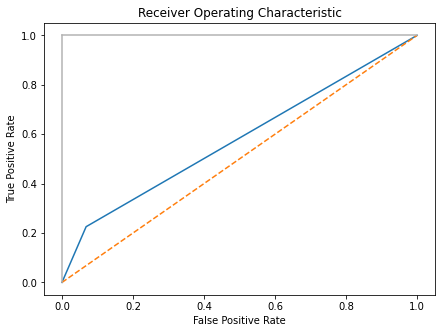

ROC/AUC Score: 0.5787768277991721


In [ ]:
# plotting roc curve (receiving operating characteristic curve)
from sklearn.metrics import roc_curve, roc_auc_score

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(log_pred, y_test)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC/AUC Score:", roc_auc_score(log_pred, y_test))

## 4.1 Improving the Model

### 4.1.1 Hyperparameter Tuning

In [ ]:
# setting up a range of values for C to test
from sklearn.metrics import accuracy_score
C_params = [0.001,0.01,0.1,1,10,100, 1000, 10000, 100000]

for c in C_params:
    log = LogisticRegression(solver = 'saga', C = c)
    log.fit(X_train, y_train)
    log_pred = log.predict(X_test)
    print("When C = {}, accuracy = {}".format(c, accuracy_score(log_pred, y_test)))

When C = 0.001, accuracy = 0.6619155696777123
When C = 0.01, accuracy = 0.6627326373127553
When C = 0.1, accuracy = 0.6667271901951883
When C = 1, accuracy = 0.668724466636405
When C = 10, accuracy = 0.6696777122106219
When C = 100, accuracy = 0.669859282796187
When C = 1000, accuracy = 0.6698138901497958
When C = 10000, accuracy = 0.6697231048570131
When C = 100000, accuracy = 0.6697231048570131


We see that the model's performance improves significantly until c = 10, from which the increase ceases to be significant.

### 4.1.2 Feature Selection

In [ ]:
# finding the optimal number of features using Recursive Feature Elimination with Cross Validation (RFECV)
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

log = LogisticRegression(solver = 'saga')
rfecv = RFECV(estimator = log, step = 1, cv = StratifiedKFold(10), scoring = 'accuracy')
rfecv.fit(X_sc, y)
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 7


In [ ]:
# getting the best features
indices = np.where(rfecv.support_ == True)
best_features = []

for index in indices:
    best_features.append(X.columns[index])
    
best_features

[Index(['appl_rej_cnt', 'out_request_cnt', 'region_rating', 'work_address_cd',
        'SNA', 'Score_bki_(-1.921, -1.568]', 'Score_bki_(-1.568, 0.2]'],
       dtype='object')]

In [ ]:
# working with these selected features
X_df = train[best_features[0]]
y_df = train['default_flg']

# scaling the features
X_df_sc = MinMaxScaler().fit_transform(X_df)

# splitting into 80-20 training and test sets
X_train, X_test, y_train, y_test = tts(X_df_sc, y_df, test_size = 0.2, stratify = y, random_state = 5)

# creating a balanced dataset
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

# implementing logistic regression
logreg = LogisticRegression(solver = 'saga')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# evaluating the model
print("Confusion matrix:")
print(confusion_matrix(y_pred, y_test))
print()
print("Classification report:")
print(classification_report(y_pred, y_test))

Confusion matrix:
[[12642   987]
 [ 6595  1806]]

Classification report:
              precision    recall  f1-score   support

           0       0.66      0.93      0.77     13629
           1       0.65      0.21      0.32      8401

    accuracy                           0.66     22030
   macro avg       0.65      0.57      0.55     22030
weighted avg       0.65      0.66      0.60     22030



Using the selected features yielded a slightly lower accuracy score. Let's combine these few features with hyperparameter tuning.

In [ ]:
for c in C_params:
    logreg = LogisticRegression(solver = 'saga', C = c, random_state = 5)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print("When C = {}, accuracy = {}".format(c, accuracy_score(y_pred, y_test)))

When C = 0.001, accuracy = 0.63604176123468
When C = 0.01, accuracy = 0.6554698138901498
When C = 0.1, accuracy = 0.6534725374489333
When C = 1, accuracy = 0.65583295506128
When C = 10, accuracy = 0.6563776668179755
When C = 100, accuracy = 0.656150703586019
When C = 1000, accuracy = 0.656150703586019
When C = 10000, accuracy = 0.656150703586019
When C = 100000, accuracy = 0.656150703586019


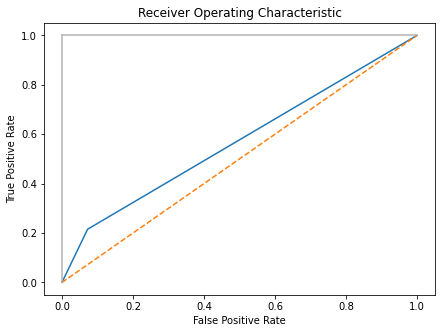

ROC/AUC Score: 0.5715817262341474


In [ ]:
# plotting roc curve (receiving operating characteristic curve)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_pred, y_test)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC/AUC Score:", roc_auc_score(y_pred, y_test))

This new mode has gotten slightly worse.

## 4.2 Alternate Models

### 4.2.1 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = train.drop(columns = ['default_flg'])
y = train.default_flg

X_sc = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = tts(X_sc, y, test_size = 0.2, random_state = 5, stratify = y)

smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(dtc_pred, y_test))
print()
print("Classification report:")
print(classification_report(dtc_pred, y_test))

Confusion matrix:
[[16573  2166]
 [ 2664   627]]

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     18739
           1       0.22      0.19      0.21      3291

    accuracy                           0.78     22030
   macro avg       0.54      0.54      0.54     22030
weighted avg       0.77      0.78      0.77     22030



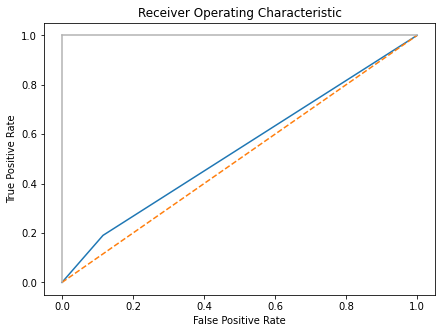

ROC/AUC Score: 0.5374658936950091


In [ ]:
# plotting roc curve (receiving operating characteristic curve)
false_positive_rate, true_positive_rate, threshold = roc_curve(dtc_pred, y_test)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC/AUC Score:", roc_auc_score(dtc_pred, y_test))

### 4.2.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = train.drop(columns = ['default_flg'])
y = train.default_flg

X_sc = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = tts(X_sc, y, test_size = 0.2, random_state = 5, stratify = y)

smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(rfc_pred, y_test))
print()
print("Classification report:")
print(classification_report(rfc_pred, y_test))

Confusion matrix:
[[18890  2605]
 [  347   188]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     21495
           1       0.07      0.35      0.11       535

    accuracy                           0.87     22030
   macro avg       0.52      0.62      0.52     22030
weighted avg       0.96      0.87      0.91     22030



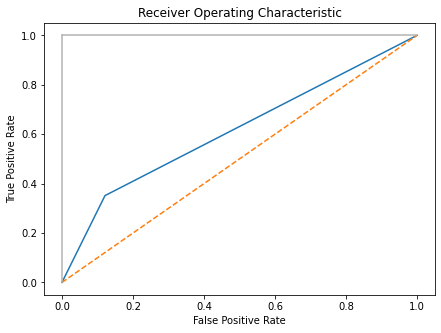

ROC/AUC Score: 0.615105447256806


In [ ]:
# plotting roc curve (receiving operating characteristic curve)
false_positive_rate, true_positive_rate, threshold = roc_curve(rfc_pred, y_test)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC/AUC Score:", roc_auc_score(rfc_pred, y_test))

# 5. Conclusion and Recommendations

A customer is more likely to default if:
- education_cd = SCH
- car_own_flg = N
- car_type_flg = N
- good_work_flg = 0
- out_request_cnt = 1
- region_rating = 50
- home_address_cd = 2
- work_address_cd = 3
- SNA = 1
- first_time_cd = 3
- Air_flg = N
    
A customer is more unlikely **NOT** to default if:
- education_cd = PGR/ACD
- car_own_flg = Y
- car_type_flg = Y
- good_work_flg = 1
- out_request_cnt >= 10
- region_rating = 20, 30
- home_address_cd = 3
- work_address_cd = 1
- SNA = 3
- first_time_cd = 4
- Air_flg = Y
    
The following variables did not yield any significant differences between the defaulters and the non-defaulters:
- gender
- age
- income
    
From the above analysis and modeling stages, it is clear that logistic regression is not the right algorithm for the dataset. We can try tuning more hyperparameters to see whether we are able to get values that would lead to a better model accuracy. If explainability isn't a huge bit factor to take into consideration then the Random Forest model can be considered.

# 6. Challenging your Solution

### a) Did we have the right question?
Yes.

### b) Did we have the right data?
Yes.

### c) What can be done to improve the solution?
Performing hyperparameter tuning, feature engineering techniques i.e. PCA. We can also experiment with other advanced machine learning techinques such as boosting and bagging.